In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions
def turun(x):
    return max(0, min(1, (1000 - x) / 1000))

def tetap(x):
    return max(0, min((x - 500) / 500, (1500 - x) / 500))

def naik(x):
    return max(0, min(1, (x - 1000) / 1000))

def sedikit(x):
    return max(0, min(1, (100 - x) / 100))

def sedang(x):
    return max(0, min((x - 50) / 50, (150 - x) / 50))

def banyak(x):
    return max(0, min(1, (x - 100) / 100))

def fuzzy_inference_system(permintaan, persediaan):
    # Fuzzy rules
    rules = [
        (turun(permintaan), sedikit(persediaan), 'bertambah'),
        (turun(permintaan), sedang(persediaan), 'berkurang'),
        (turun(permintaan), banyak(persediaan), 'berkurang'),
        (tetap(permintaan), sedikit(persediaan), 'bertambah'),
        (tetap(permintaan), sedang(persediaan), 'berkurang'),
        (tetap(permintaan), banyak(persediaan), 'berkurang'),
        (naik(permintaan), sedikit(persediaan), 'bertambah'),
        (naik(permintaan), sedang(persediaan), 'bertambah'),
        (naik(permintaan), banyak(persediaan), 'berkurang'),
    ]
# Defuzzification values
    produksi_values = {'bertambah': 1500, 'berkurang': 500}

 # Aggregation and defuzzification
    numerator = 0
    denominator = 0
    for rule in rules:
        fuzzy_value, action = min(rule[0], rule[1]), rule[2]
        output = produksi_values[action]
        numerator += fuzzy_value * output
        denominator += fuzzy_value

    produksi = numerator / denominator if denominator != 0 else 0
    return produksi


In [12]:
# Plot membership functions
def plot_membership_functions():
    x_perm = np.linspace(0, 2000, 1000)
    x_pers = np.linspace(0, 200, 1000)

    plt.figure(figsize=(10, 8))

 # Plot permintaan
    plt.subplot(2, 1, 1)
    plt.plot(x_perm, [turun(x) for x in x_perm], label='Turun')
    plt.plot(x_perm, [tetap(x) for x in x_perm], label='Tetap')
    plt.plot(x_perm, [naik(x) for x in x_perm], label='Naik')
    plt.title('Fungsi Keanggotaan Permintaan')
    plt.xlabel('Permintaan')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()

 # Plot persediaan
    plt.subplot(2, 1, 2)
    plt.plot(x_pers, [sedikit(x) for x in x_pers], label='Sedikit')
    plt.plot(x_pers, [sedang(x) for x in x_pers], label='Sedang')
    plt.plot(x_pers, [banyak(x) for x in x_pers], label='Banyak')
    plt.title('Fungsi Keanggotaan Persediaan')
    plt.xlabel('Persediaan')
    plt.ylabel('Derajat Keanggotaan')
    plt.legend()

    plt.tight_layout()
    plt.show()

Produksi yang dihitung: 900.00


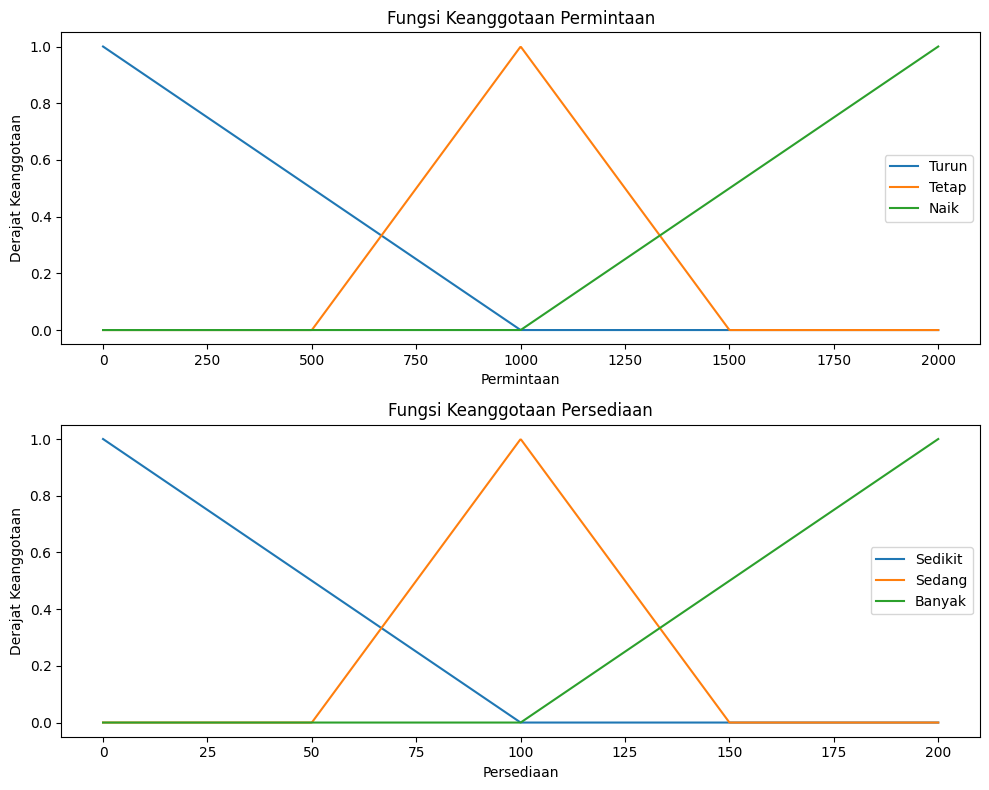

In [13]:
# Example input
permintaan = 750
persediaan = 75
produksi = fuzzy_inference_system(permintaan, persediaan)
print(f"Produksi yang dihitung: {produksi:.2f}")

# Plot the membership functions
plot_membership_functions()
